# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Fecha de entrega:
Miércoles 2 de octubre a las 23:59 hs.

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# cargo archivo CSV en un df
df_original= pd.read_csv('Base Airbnb NY.csv')
df_original

#Visualizo duplicados, desde el archivo, rastreo duplicados(que cantidad son)
datos_duplicados = df_original.duplicated().sum()
print("Número de datos duplicados:",datos_duplicados)
# Eliminar duplicados
df_no_duplicados = df_original.drop_duplicates()
df_no_duplicados

Número de datos duplicados: 10


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,NaN,NaN,6,2


In [2]:
# Elimino columnas que no me parecen de interes.
columnas_a_eliminar = ['name', 'host_name', 'id', 'host_id','last_review','reviews_per_month']
data_clean = df_no_duplicados.drop(columns=columnas_a_eliminar)
data_clean


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,6,2


In [3]:
#Elimino los NA
data_cleanfinal= data_clean.dropna()
data_cleanfinal

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,6,2


In [27]:
#OUTLIERS
# Aplicamos logaritmo con np.log1p(), que equivale a np.log(1 + x) y maneja mejor los valores cercanos a 0
data_cleanfinal.loc[:, 'log_minimum_nights'] = np.log1p(data_cleanfinal['minimum_nights'])
data_cleanfinal.loc[:, 'log_price'] = np.log1p(data_cleanfinal['price'])
data_cleanfinal.loc[:, 'log_number_of_reviews'] = np.log1p(data_cleanfinal['number_of_reviews'])
data_cleanfinal.loc[:, 'log_calculated_host_listings_count'] = np.log1p(data_cleanfinal['calculated_host_listings_count'])
data_cleanfinal.loc[:, 'log_availability_365'] = np.log1p(data_cleanfinal['availability_365'])

# Eliminamos filas con NaN si aparecen
data_cleanfinal = data_cleanfinal.dropna()

# Visualizamos el resultado
print(data_cleanfinal)


      neighbourhood_group       neighbourhood  latitude  longitude  \
0                Brooklyn          Kensington  40.64749  -73.97237   
1               Manhattan             Midtown  40.75362  -73.98377   
2               Manhattan              Harlem  40.80902  -73.94190   
3                Brooklyn        Clinton Hill  40.68514  -73.95976   
4               Manhattan         East Harlem  40.79851  -73.94399   
...                   ...                 ...       ...        ...   
48890            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891            Brooklyn            Bushwick  40.70184  -73.93317   
48892           Manhattan              Harlem  40.81475  -73.94867   
48893           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894           Manhattan      Hell's Kitchen  40.76404  -73.98933   

             room_type  price  minimum_nights  number_of_reviews  \
0         Private room  149.0             1.0                9.0   
1      Entire home/apt 

In [29]:
df_datos_log= data_cleanfinal.drop(columns=['minimum_nights', 'price', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365'])
df_datos_log

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,log_minimum_nights,log_price,log_number_of_reviews,log_calculated_host_listings_count,log_availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,0.693147,5.010635,2.302585,1.945910,5.902633
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,0.693147,5.420535,3.828641,1.098612,5.874931
2,Manhattan,Harlem,40.80902,-73.94190,Private room,1.386294,5.017280,0.000000,0.693147,5.902633
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,0.693147,4.499810,5.602119,0.693147,5.273000
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,2.397895,4.394449,2.302585,0.693147,0.000000
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,1.098612,4.262680,0.000000,1.098612,2.302585
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,1.609438,3.713572,0.000000,1.098612,3.610918
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,2.397895,4.753590,0.000000,0.693147,3.332205
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,0.693147,4.025352,0.000000,1.945910,1.098612


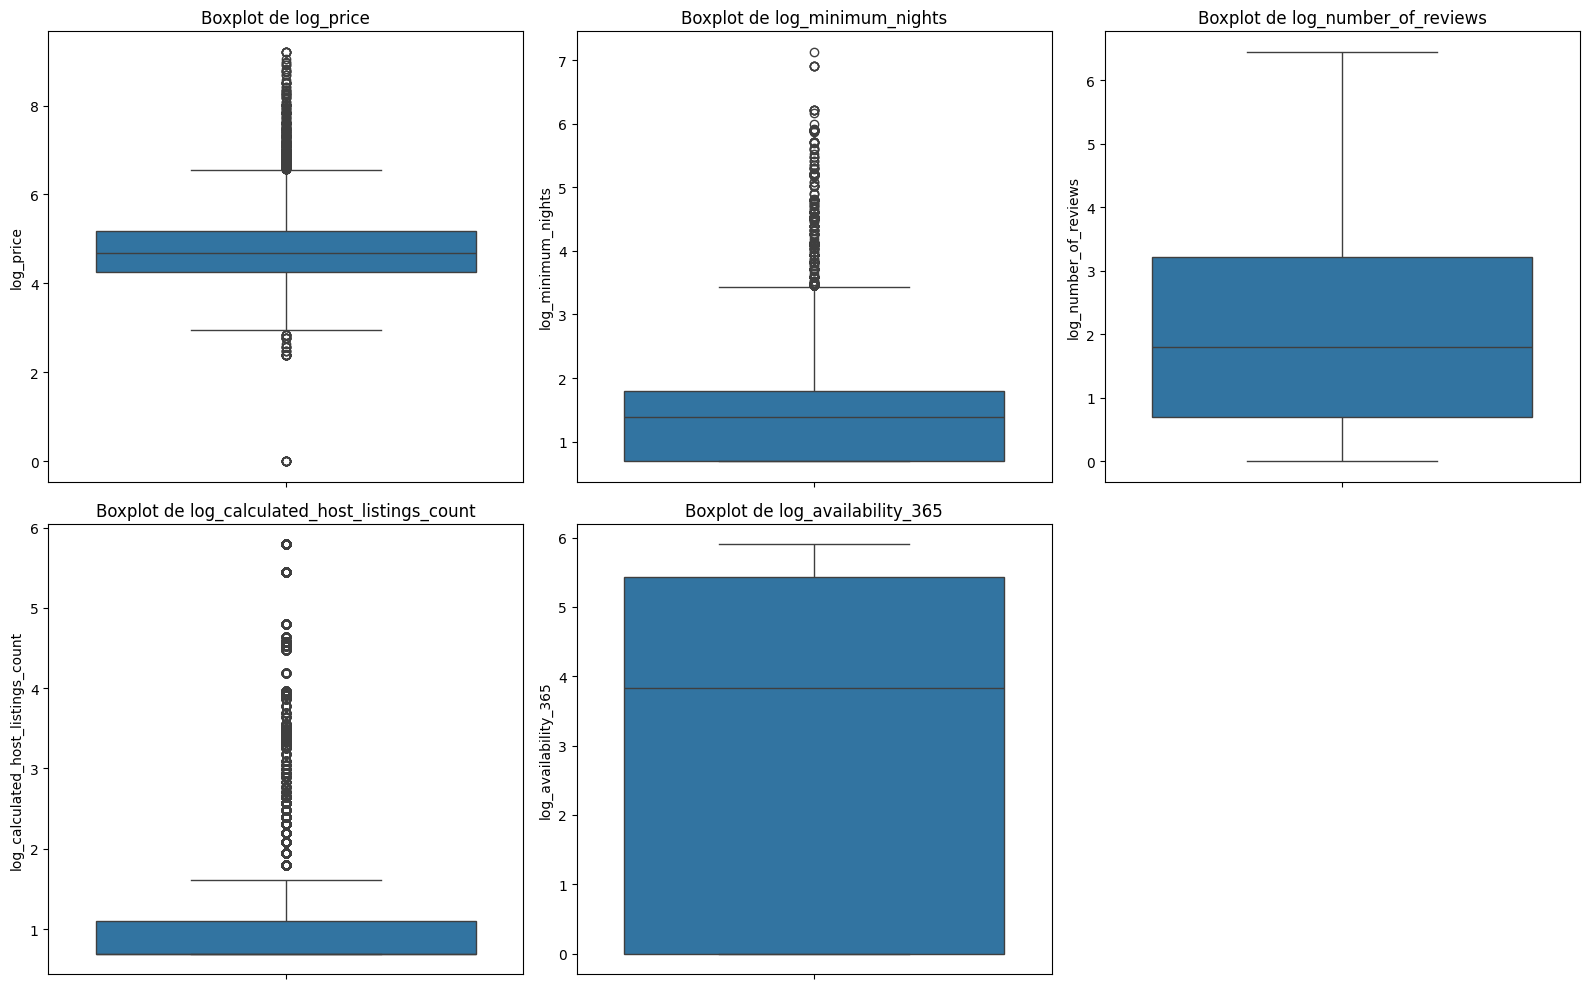

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear subplots para visualizar los boxplots de cada columna
plt.figure(figsize=(16, 10))  # Ajustar el tamaño de la figura
for i, col in enumerate(columnas, 1):
    plt.subplot(2, 3, i)  # Crear una cuadrícula de 2 filas y 3 columnas
    sns.boxplot(data=data_cleanfinal[col])
    plt.title(f'Boxplot de {col}')  # Título del gráfico

plt.tight_layout()  # Ajustar el layout para que no se superpongan los gráficos
plt.show()

In [37]:
#Outliers
#Defino columnas cuantis para analizar outliers
columnas = ['log_price', 'log_minimum_nights', 'log_number_of_reviews',
'log_calculated_host_listings_count', 'log_availability_365']

# Calcular mediana y IQR para cada columna
Q1 = df_datos_log[columnas].quantile(0.25)
Q3 = df_datos_log[columnas].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR #limites
limite_superior = Q3 + 1.5 * IQR

# Filtrar datos sin outliers
data_sin_outliers = df_datos_log.copy()
for col in columnas:
    data_sin_outliers = data_sin_outliers[(data_sin_outliers[col] >= limite_inferior[col]) &
                                          (data_sin_outliers[col] <= limite_superior[col])]
data_sin_outliers

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,log_minimum_nights,log_price,log_number_of_reviews,log_calculated_host_listings_count,log_availability_365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,0.693147,5.420535,3.828641,1.098612,5.874931
2,Manhattan,Harlem,40.80902,-73.94190,Private room,1.386294,5.017280,0.000000,0.693147,5.902633
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,0.693147,4.499810,5.602119,0.693147,5.273000
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,2.397895,4.394449,2.302585,0.693147,0.000000
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,1.386294,5.303305,4.317488,0.693147,4.867534
...,...,...,...,...,...,...,...,...,...,...
48889,Queens,Jamaica,40.69137,-73.80844,Private room,0.693147,4.189655,0.000000,1.098612,5.099866
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,1.098612,4.262680,0.000000,1.098612,2.302585
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,1.609438,3.713572,0.000000,1.098612,3.610918
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,2.397895,4.753590,0.000000,0.693147,3.332205


In [38]:
# Transformar las variables 'neighbourhood_group' y 'room_type' a variables numéricas
room_type_dummies = pd.get_dummies(data_sin_outliers['room_type'], drop_first=True, prefix=['room_type'])
neighbourhood_dummies = pd.get_dummies(data_sin_outliers['neighbourhood_group'], drop_first=True, prefix=['neighbourhood'])
data_neighbourhoodyroom = pd.concat([data_sin_outliers, room_type_dummies, neighbourhood_dummies], axis=1)
print(data_neighbourhoodyroom.head())

#columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna offer group
offer_count = data_neighbourhoodyroom.groupby('neighbourhood_group').size().reset_index(name='offer_group')
data_with_offer_group = pd.merge(data_neighbourhoodyroom, offer_count, on='neighbourhood_group', how='left')
print(data_with_offer_group[['neighbourhood_group', 'offer_group']].head())

#Nuevo DF
data_with_offer_group.to_csv('Base_Airbnb_NY_Transformada.csv', index=False)


  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   
5           Manhattan   Murray Hill  40.74767  -73.97500  Entire home/apt   

   log_minimum_nights  log_price  log_number_of_reviews  \
1            0.693147   5.420535               3.828641   
2            1.386294   5.017280               0.000000   
3            0.693147   4.499810               5.602119   
4            2.397895   4.394449               2.302585   
5            1.386294   5.303305               4.317488   

   log_calculated_host_listings_count  log_availability_365  \
1                            1.098612              5.874931   
2                            0.693147              5.902

### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

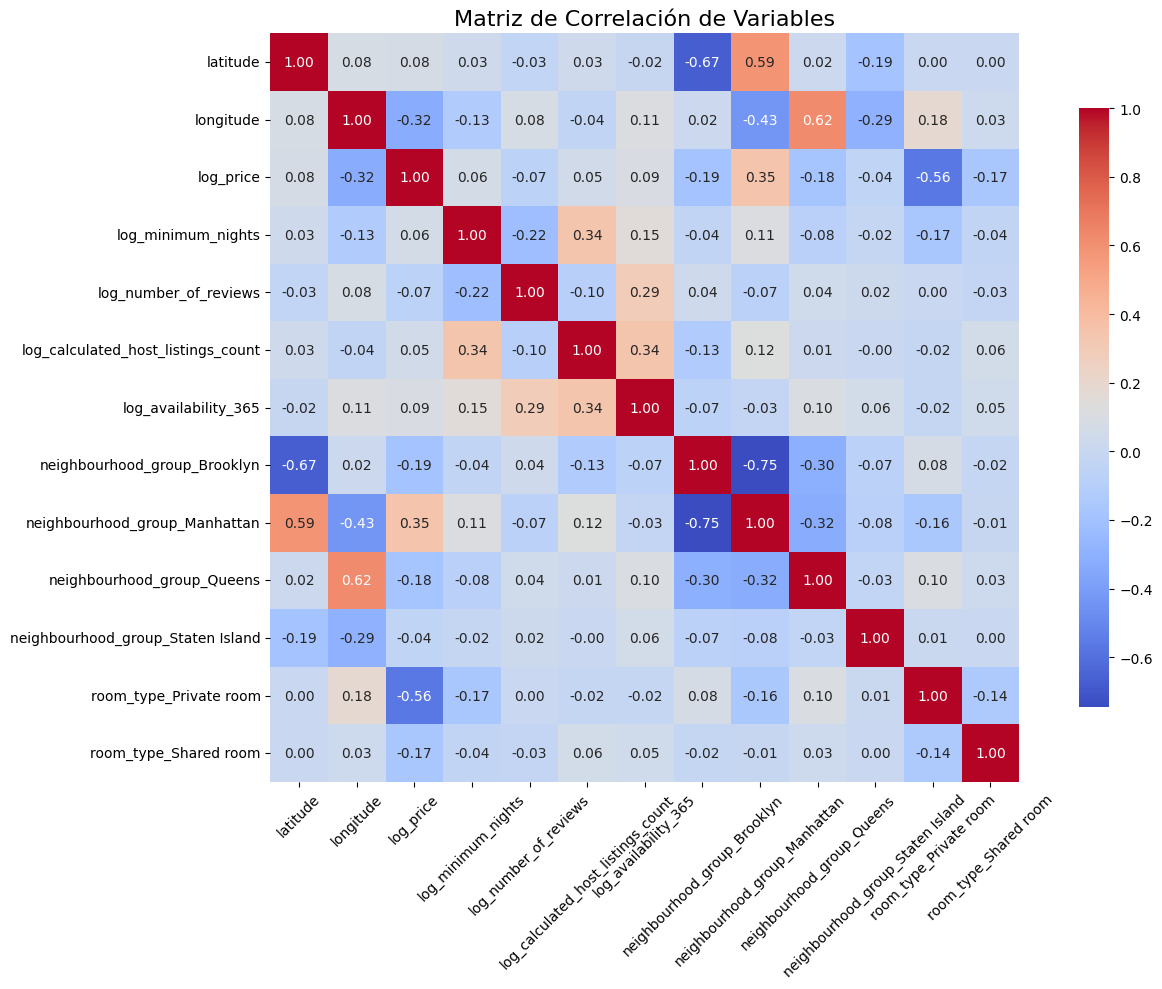

In [57]:

variables_categoricas = ['neighbourhood_group', 'room_type']

# Seleccionamos las variables continuas y categóricas
variables = ['latitude', 'longitude', 'log_price', 'log_minimum_nights', 
             'log_number_of_reviews', 'log_calculated_host_listings_count', 
             'log_availability_365'] + variables_categoricas

# df con las variables seleccionadas (incluidas las categóricas)
df_seleccionado = df_datos_log[variables]

# Convertir variables categóricas ('neighbourhood_group' y 'room_type') a numéricas usando pd.get_dummies
df_numerico = pd.get_dummies(df_seleccionado, drop_first=True)

# 3. Generar la matriz de correlación
matriz_correlacion = df_numerico.corr()

# 4. Visualizamos la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación de Variables', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

neighbourhood_group
Manhattan        0.443160
Brooklyn         0.411112
Queens           0.115829
Bronx            0.022265
Staten Island    0.007633
Name: proportion, dtype: float64


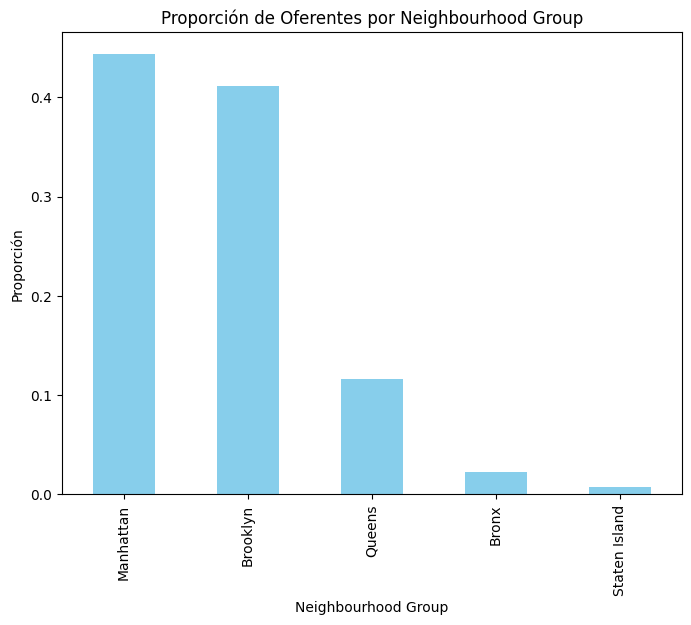

room_type
Entire home/apt    0.519718
Private room       0.456544
Shared room        0.023739
Name: proportion, dtype: float64


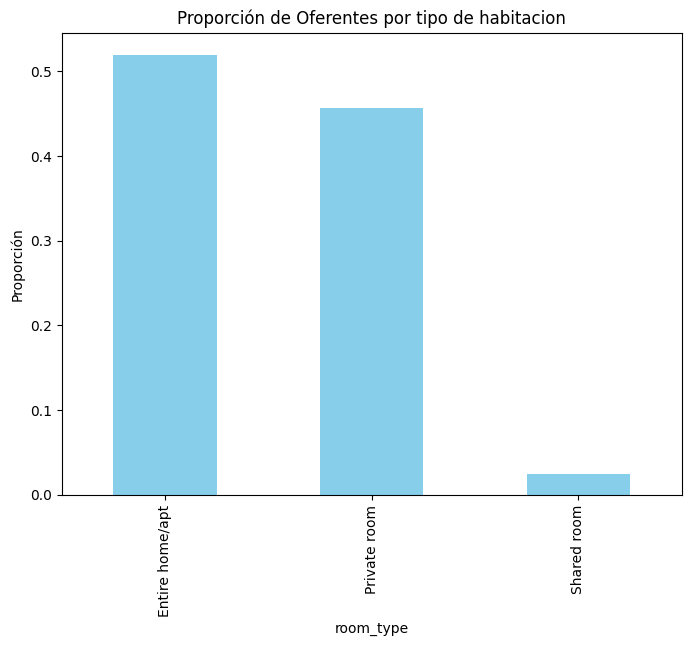

In [58]:
# Resolver acá
# Preprocesamiento
proporcion_neighbourhood = data_cleanfinal['neighbourhood_group'].value_counts(normalize=True)
print(proporcion_neighbourhood)
# Se visualiza con un plot normal
proporcion_neighbourhood.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title('Proporción de Oferentes por Neighbourhood Group')
plt.ylabel('Proporción')
plt.xlabel('Neighbourhood Group')
plt.show()

proporcion_room_type = data_cleanfinal['room_type'].value_counts(normalize=True)
print(proporcion_room_type)
# Se visualiza con un plot normal
proporcion_room_type.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title('Proporción de Oferentes por tipo de habitacion')
plt.ylabel('Proporción')
plt.xlabel('room_type')
plt.show()


#### Ejercicio 4
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación? 

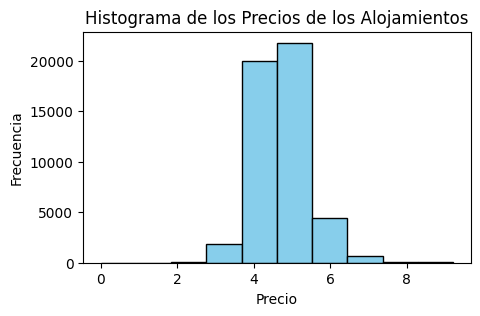

Precio mínimo: 0.0
Precio máximo: 10000.0
Precio promedio: 152.74812237798014

Media de precio por neighbourhood group:
neighbourhood_group
Bronx             87.425551
Brooklyn         124.398775
Manhattan        196.885800
Queens            99.555477
Staten Island    114.812332
Name: price, dtype: float64

Media de precio por tipo de habitación:
room_type
Entire home/apt    211.825130
Private room        89.792371
Shared room         70.127586
Name: price, dtype: float64


In [66]:
#Histograma de los precios de los alojamientos.
plt.figure(figsize=(5, 3))
plt.hist(data_cleanfinal['log_price'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de los Precios de los Alojamientos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Cálculo de estadísticas de precios
precio_minimo = data_cleanfinal['price'].min()
precio_maximo = data_cleanfinal['price'].max()
precio_promedio = data_cleanfinal['price'].mean()

# Media de precio por neighbourhood_group
media_precio_neighbourhood = data_cleanfinal.groupby('neighbourhood_group')['price'].mean()

# Media de precio por tipo de habitación
media_precio_tipo_habitacion = data_cleanfinal.groupby('room_type')['price'].mean()

# Mostrar resultados
print(f"Precio mínimo: {precio_minimo}")
print(f"Precio máximo: {precio_maximo}")
print(f"Precio promedio: {precio_promedio}")
print("\nMedia de precio por neighbourhood group:")
print(media_precio_neighbourhood)
print("\nMedia de precio por tipo de habitación:")
print(media_precio_tipo_habitacion)


#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

(0.0, 11000.0)

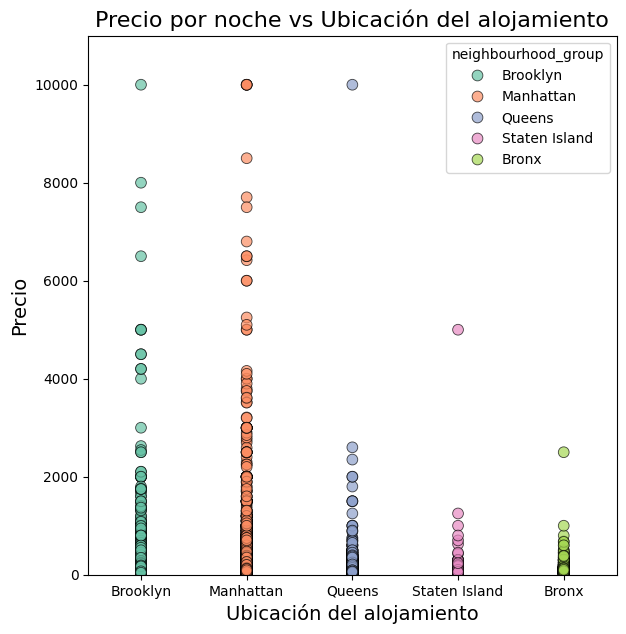

In [124]:
# Resolver acá
#Primer scatter plot: Precio vs Ubicación del alojamiento
plt.figure(figsize=(15, 7))  # Aumentar el tamaño total de la figura
 
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
sns.scatterplot(data=data_cleanfinal, x='neighbourhood_group', y='price', 
                hue='neighbourhood_group',  # Usar una paleta para el color según el grupo
                palette='Set2',  # Elegir una paleta de colores
                alpha=0.7, s=60, edgecolor='black')  # Aumentar el tamaño de los puntos y definir borde  
plt.title("Precio por noche vs Ubicación del alojamiento", fontsize=16)
plt.xlabel("Ubicación del alojamiento", fontsize=14)
plt.ylabel("Precio", fontsize=14)
plt.xlim(-0.5, len(data_cleanfinal['neighbourhood_group'].unique()) - 0.5)
plt.ylim(0, data_cleanfinal['price'].max() * 1.1)  # Limitar el eje y 
 
# Segundo scatter plot: Número de Reseñas vs Tipo de habitacion


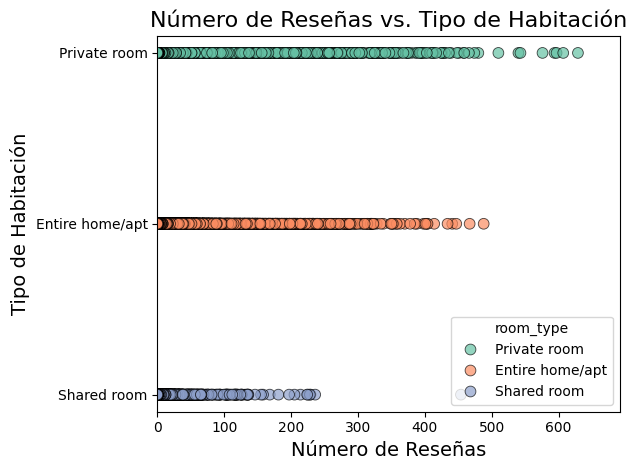

In [130]:
# Segundo scatter plot: Número de Reseñas vs. Tipo de Habitación
sns.scatterplot(data=data_cleanfinal, x='number_of_reviews', y='room_type', 
               hue='room_type', alpha=0.7, s=60, edgecolor='black', palette="Set2")
plt.title('Número de Reseñas vs. Tipo de Habitación', fontsize=16)
plt.xlabel('Número de Reseñas', fontsize=14)
plt.ylabel('Tipo de Habitación', fontsize=14)
plt.xlim(0, data_cleanfinal['number_of_reviews'].max() * 1.1)  # Limitar eje x
plt.tight_layout()  # Ajustar el layout
plt.show()

#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

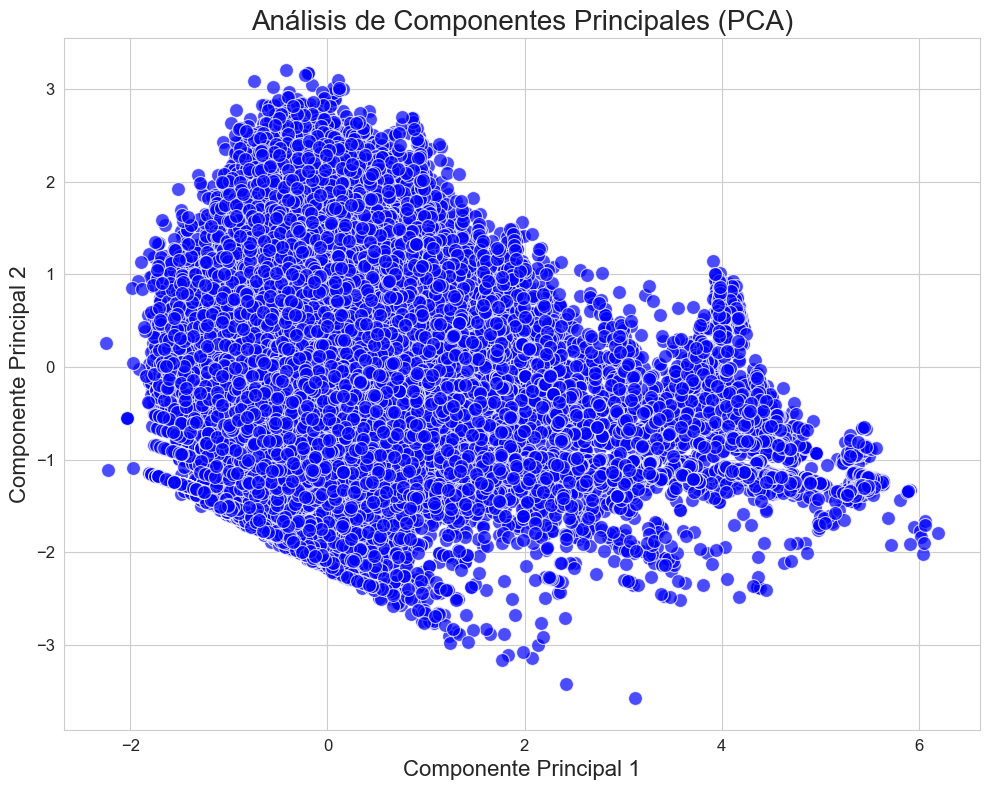

Varianza explicada: [0.31850256 0.26105422]
Porcentaje de varianza explicada por los dos componentes: 57.96%
Varianza explicada por PC1: 31.85%
Varianza explicada por PC2: 26.11%
                                    Componente 1  Componente 2
log_price                               0.200459     -0.070904
log_minimum_nights                      0.549060     -0.325084
log_number_of_reviews                  -0.085153      0.772770
log_calculated_host_listings_count      0.636029     -0.015348
log_availability_365                    0.496553      0.540263


In [136]:
# Resolver acá
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

columnas = ['log_price', 'log_minimum_nights', 'log_number_of_reviews', 
            'log_calculated_host_listings_count', 'log_availability_365'] 


data_cleanfinal = data_cleanfinal.dropna(subset=columnas)
data_normalizada = StandardScaler().fit_transform(data_cleanfinal[columnas])

# Realizar PCA
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(data_normalizada)
Estas 3 variables son las que más poonderan en el primer componente. Son las que más ayudan a comprender la varianza explicada
top_3_PCA1 = loadings['PC1'].nlargest(3)      
print(top_3_PCA1) 
# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(data=componentes_principales, columns=['Componente 1', 'Componente 2'])

# Loadings
loadings = pd.DataFrame(pca.components_.T, 
                        index=columnas, 
                        columns=['Componente 1', 'Componente 2'])

# Porcentaje de varianza explicada
varianza_explicada = pca.explained_variance_ratio_

#Graficar
plt.figure(figsize=(10, 8))  # Aumentar el tamaño de la figura
sns.set_style("whitegrid")  # Establecer el estilo del gráfico
sns.scatterplot(x='Componente 1', y='Componente 2', data=df_pca, alpha=0.7, s=100, color='blue')
plt.title('Análisis de Componentes Principales (PCA)', fontsize=20)
plt.xlabel('Componente Principal 1', fontsize=16)
plt.ylabel('Componente Principal 2', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

print("Varianza explicada:", varianza_explicada)
print(f'Porcentaje de varianza explicada por los dos componentes: {varianza_explicada.sum() * 100:.2f}%')
print(f"Varianza explicada por PC1: {varianza_explicada[0]*100:.2f}%")
print(f"Varianza explicada por PC2: {varianza_explicada[1]*100:.2f}%")
print(loadings)

In [149]:
#Ordeno las 3 variables que más ponderan en el primer componente. Son las que más ayudan a comprender la varianza explicada
vars_PCA1 = loadings['Componente 1'].nlargest(3)      
print("Tres variables que mas ponderan en el primer componente:", vars_PCA1) 

#Lo mismo para el segudno componente
vars_PCA2 = loadings['Componente 2'].nlargest(3)      
print("Tres variables que mas ponderan en el segundo componente:",vars_PCA2) 

Tres variables que mas ponderan en el primer componente: log_calculated_host_listings_count    0.636029
log_minimum_nights                    0.549060
log_availability_365                  0.496553
Name: Componente 1, dtype: float64
Tres variables que mas ponderan en el segundo componente: log_number_of_reviews                 0.772770
log_availability_365                  0.540263
log_calculated_host_listings_count   -0.015348
Name: Componente 2, dtype: float64


### Parte III: Predicción

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 7--- dijo no hacer
Eliminen de la base todas las variables relacionadas al precio

#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [150]:
# Resolver acá
import pandas as pd
from sklearn.model_selection import train_test_split

y = data_cleanfinal['price'] #definir variables
X = data_cleanfinal.drop(columns=['price'])

# Se agrega la columna de unos para x
X = pd.concat([pd.Series(1, index=X.index, name='Intercepto'), X], axis=1)

# Se divide la base de datos en conjunto de entrenamiento y prueba (70 Y 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=201)

# Verifica las dimensiones de los conjuntos
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (34205, 15)
Dimensiones de X_test: (14660, 15)
Dimensiones de y_train: (34205,)
Dimensiones de y_test: (14660,)


#### Ejercicio 9
Implementen una regresión lineal y comenten los resultados obtenidos.

In [ ]:
#  Resolver acá

